In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm
import sys

p = Path('.').resolve()
sys.path.append(str(p.parent))

In [2]:
from utils.data_utils import *
from utils.faiss_utils import *

Loading faiss with AVX2 support.


In [3]:
def load_XY(basename):
    """
    Load embeddings (X) and possibly the
    labels (Y) of the graph {basename}.
    """
    model_path = Path("/data/models") / basename
    print("Loading data..")
    X, Y = load_data(model_path)
    classes = len(np.unique(Y))
    print("X shape: {}".format(X.shape))
    return X, Y

In [4]:
basename = "itwiki-2013_partitioned"
x, y = load_XY(basename)
x.shape

Loading data..
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
X shape: (1016179, 64)


(1016179, 64)

In [5]:
itwiki_kmeans = kmeans(x, 50, niter=100)
D, I = itwiki_kmeans.index.search(x, 1)

In [6]:
entities = get_entities_list(basename)
centroid_neigh("itwiki-2013", itwiki_kmeans, x, entities, n=5)

 Cluster 0 
Quesada

Monção

Corrales

Macieira

Villagomez

 Cluster 1 
Caterina d'Alessandria

Rosone

Facciata a salienti

Pieve dei Santi Cosma e Damiano di Barbassolo

Chiesa di San Nicola di Mira (Rodi Garganico)

 Cluster 2 
Gaetano Quagliariello

Commissione parlamentare per l'indirizzo generale e la vigilanza dei servizi radiotelevisivi

Stefano Rodotà

Marco Causi

Giancarlo Lombardi

 Cluster 3 
Tonight (album David Bowie)

Exposure (Robert Fripp)

Clear Spot

Darryl Jones

Blood on the Snow

 Cluster 4 
Ōshima

Itoman

Prefettura di Fukui

Kanku-dai

Inaba (provincia)

 Cluster 5 
Amodghata

Chandpur

Eksara

Aliganj

Pichhore

 Cluster 6 
Bathyergidae

Propithecus deckenii coronatus

Estrildidae

Bisonalveus

Eurymylidae

 Cluster 7 
Il secondo sesso

Ottimismo

Judith Butler

Luce Irigaray

Filosofia postmoderna

 Cluster 8 
Rote Raben Vilsbiburg

TV Fischbek Amburgo

Convocazioni al torneo di qualificazione europeo al World Grand Prix di pallavolo femminile 2011

Denso A

In [7]:
I.shape

(1016179, 1)

In [13]:
def find_neighbours(basename, idx, ent_list):
    ids_file = Path('/data/graphs/') / basename / (basename + '.urls')
    if not ids_file.exists():
        ids_file = Path('/data/graphs/') / basename / (basename + '.ids')
    assert ids_file.exists(), "File not found!"
    f = ids_file.as_posix()
    for node in idx:
        line = ent_list[node]
        yield linecache.getline(f, line + 1).rstrip()


In [32]:
from scipy.spatial.distance import pdist

help(pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *args, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : ndarray
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
        'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
    *args : tuple. Deprecated.
        Additional arguments should be passed as keyword arguments
    **kwargs : dict, optional
        Extra arguments to `metric`: refer to each metric documentation for a

In [37]:
subset = np.random.choice(len(x), 50, replace=False)
titles = [i for i in find_neighbours("itwiki-2013", subset, entities)]
titles[:10]

['Josef Weinheber',
 'Il bidone',
 'Prima dammi un bacio',
 'Bagnile',
 'Luis Trujillo',
 'Ordine al Merito della Repubblica di Cipro',
 'Ritratto di Baldassarre Castiglione (Tiziano)',
 'Mission Elapsed Time',
 'Avorio nero',
 'Teoria dei giochi']

In [38]:
dist = pdist(x[subset], 'euclidean')

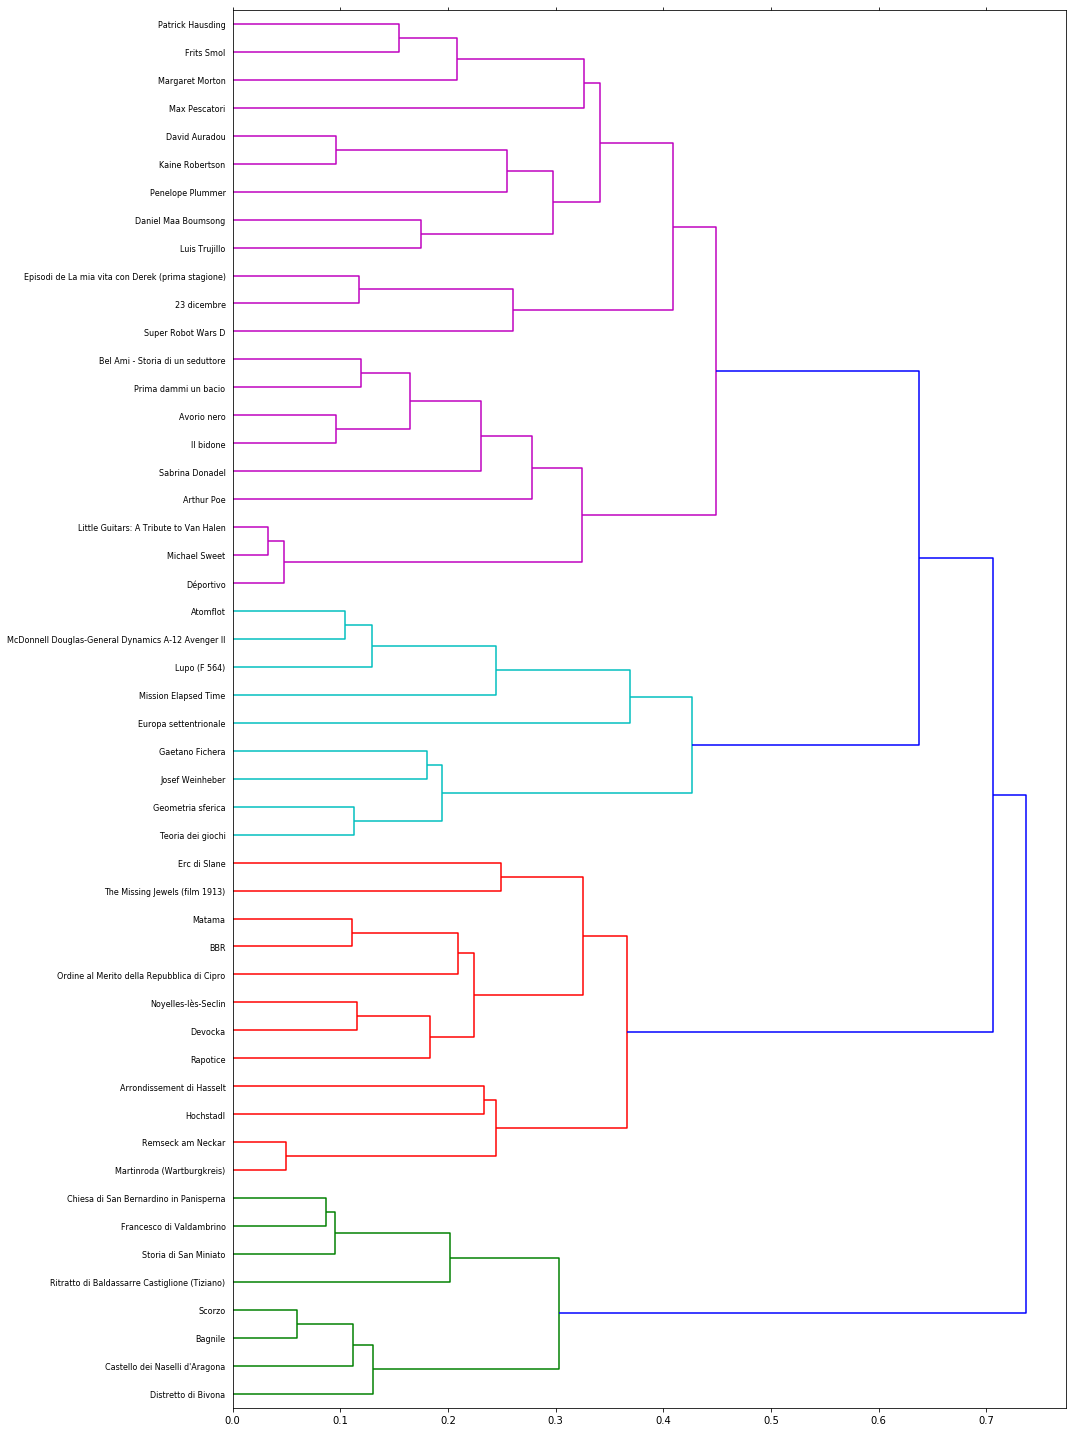

In [39]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters